In [1]:
# https://www.kaggle.com/competitions/pgsfashionmnist
import pandas as pd
from img_classificator import SimpleImgClassificatorManager
from keras.optimizers import RMSprop

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_df = pd.read_csv('./input/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('./input/fashion-mnist_test.csv', sep=',')
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


(Preprocessing: Done in 0.88 secs)
Epoch 1/100
375/375 [==============================] - 21s 49ms/step - loss: 0.6417 - accuracy: 0.7631 - val_loss: 1.5201 - val_accuracy: 0.5878 - lr: 5.0000e-04
Epoch 2/100
375/375 [==============================] - 16s 43ms/step - loss: 0.4592 - accuracy: 0.8300 - val_loss: 0.4112 - val_accuracy: 0.8425 - lr: 5.0000e-04
Epoch 3/100
375/375 [==============================] - 17s 45ms/step - loss: 0.4050 - accuracy: 0.8507 - val_loss: 0.2818 - val_accuracy: 0.8957 - lr: 5.0000e-04
Epoch 4/100
375/375 [==============================] - 16s 43ms/step - loss: 0.3751 - accuracy: 0.8615 - val_loss: 0.2620 - val_accuracy: 0.9005 - lr: 5.0000e-04
Epoch 5/100
375/375 [==============================] - 16s 43ms/step - loss: 0.3504 - accuracy: 0.8712 - val_loss: 0.2972 - val_accuracy: 0.8905 - lr: 5.0000e-04
Epoch 6/100
375/375 [==============================] - 16s 43ms/step - loss: 0.3367 - accuracy: 0.8748 - val_loss: 0.2605 - val_accuracy: 0.9042 - lr: 5.00

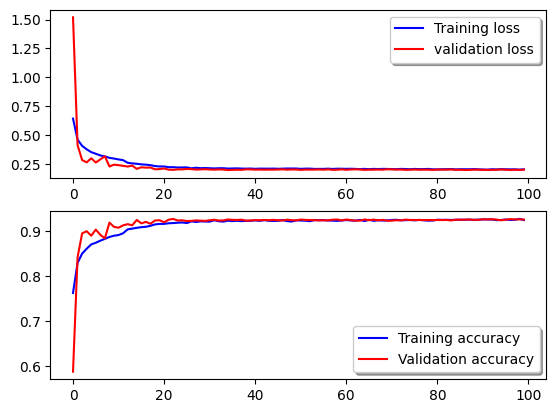

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 32
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters*1.5, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters*1.5, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 0.61 secs)
Epoch 1/100
375/375 [==============================] - 39s 98ms/step - loss: 0.5943 - accuracy: 0.7815 - val_loss: 2.5584 - val_accuracy: 0.4201 - lr: 5.0000e-04
Epoch 2/100
375/375 [==============================] - 36s 95ms/step - loss: 0.4128 - accuracy: 0.8464 - val_loss: 0.3238 - val_accuracy: 0.8786 - lr: 5.0000e-04
Epoch 3/100
375/375 [==============================] - 36s 95ms/step - loss: 0.3667 - accuracy: 0.8630 - val_loss: 0.3168 - val_accuracy: 0.8832 - lr: 5.0000e-04
Epoch 4/100
375/375 [==============================] - 36s 95ms/step - loss: 0.3374 - accuracy: 0.8740 - val_loss: 0.2598 - val_accuracy: 0.9013 - lr: 5.0000e-04
Epoch 5/100
375/375 [==============================] - 36s 95ms/step - loss: 0.3163 - accuracy: 0.8823 - val_loss: 0.2859 - val_accuracy: 0.8910 - lr: 5.0000e-04
Epoch 6/100
375/375 [==============================] - 36s 96ms/step - loss: 0.3040 - accuracy: 0.8862 - val_loss: 0.2309 - val_accuracy: 0.9142 - lr: 5.00

KeyboardInterrupt: 

(Preprocessing: Done in 0.72 secs)
Epoch 1/100
375/375 [==============================] - 45s 112ms/step - loss: 0.7026 - accuracy: 0.7378 - val_loss: 1.4627 - val_accuracy: 0.4230 - lr: 5.0000e-04
Epoch 2/100
375/375 [==============================] - 42s 111ms/step - loss: 0.4839 - accuracy: 0.8148 - val_loss: 0.4082 - val_accuracy: 0.8338 - lr: 5.0000e-04
Epoch 3/100
375/375 [==============================] - 42s 111ms/step - loss: 0.4156 - accuracy: 0.8436 - val_loss: 0.3348 - val_accuracy: 0.8708 - lr: 5.0000e-04
Epoch 4/100
375/375 [==============================] - 42s 111ms/step - loss: 0.3717 - accuracy: 0.8613 - val_loss: 0.3076 - val_accuracy: 0.8837 - lr: 5.0000e-04
Epoch 5/100
375/375 [==============================] - 42s 111ms/step - loss: 0.3485 - accuracy: 0.8696 - val_loss: 0.2984 - val_accuracy: 0.8855 - lr: 5.0000e-04
Epoch 6/100
375/375 [==============================] - 42s 111ms/step - loss: 0.3280 - accuracy: 0.8775 - val_loss: 0.3269 - val_accuracy: 0.8735 - lr

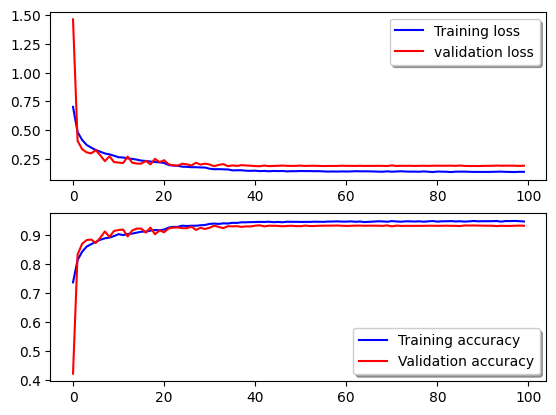

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 0.63 secs)
Epoch 1/100
375/375 [==============================] - 138s 362ms/step - loss: 0.7088 - accuracy: 0.7405 - val_loss: 3.7075 - val_accuracy: 0.1952 - lr: 5.0000e-04
Epoch 2/100
375/375 [==============================] - 131s 349ms/step - loss: 0.4553 - accuracy: 0.8297 - val_loss: 0.6298 - val_accuracy: 0.7839 - lr: 5.0000e-04
Epoch 3/100
375/375 [==============================] - 131s 348ms/step - loss: 0.3873 - accuracy: 0.8550 - val_loss: 0.3565 - val_accuracy: 0.8660 - lr: 5.0000e-04
Epoch 4/100
375/375 [==============================] - 127s 339ms/step - loss: 0.3483 - accuracy: 0.8702 - val_loss: 0.3162 - val_accuracy: 0.8813 - lr: 5.0000e-04
Epoch 5/100
375/375 [==============================] - 124s 331ms/step - loss: 0.3243 - accuracy: 0.8802 - val_loss: 0.2701 - val_accuracy: 0.9023 - lr: 5.0000e-04
Epoch 6/100
375/375 [==============================] - 124s 331ms/step - loss: 0.3037 - accuracy: 0.8860 - val_loss: 0.2410 - val_accuracy: 0.909

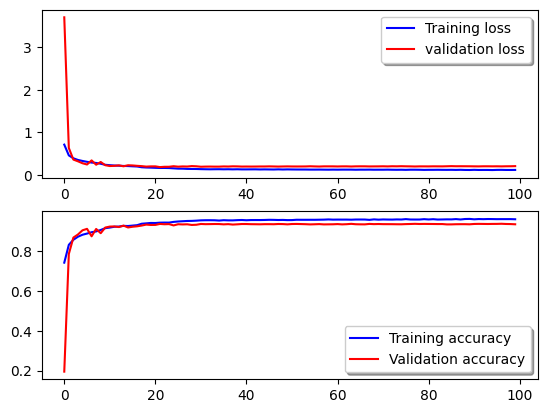

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 128
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 0.99 secs)
Epoch 1/100
375/375 [==============================] - 474s 1s/step - loss: 0.7558 - accuracy: 0.7237 - val_loss: 2.6116 - val_accuracy: 0.3096 - lr: 5.0000e-04
Epoch 2/100
375/375 [==============================] - 457s 1s/step - loss: 0.4960 - accuracy: 0.8117 - val_loss: 0.6350 - val_accuracy: 0.7671 - lr: 5.0000e-04
Epoch 3/100
375/375 [==============================] - 455s 1s/step - loss: 0.4134 - accuracy: 0.8442 - val_loss: 0.3720 - val_accuracy: 0.8556 - lr: 5.0000e-04
Epoch 4/100
375/375 [==============================] - 468s 1s/step - loss: 0.3655 - accuracy: 0.8631 - val_loss: 0.3687 - val_accuracy: 0.8574 - lr: 5.0000e-04
Epoch 5/100
375/375 [==============================] - 479s 1s/step - loss: 0.3393 - accuracy: 0.8724 - val_loss: 0.2678 - val_accuracy: 0.8997 - lr: 5.0000e-04
Epoch 6/100
375/375 [==============================] - 455s 1s/step - loss: 0.3125 - accuracy: 0.8835 - val_loss: 0.2999 - val_accuracy: 0.8863 - lr: 5.0000e-04

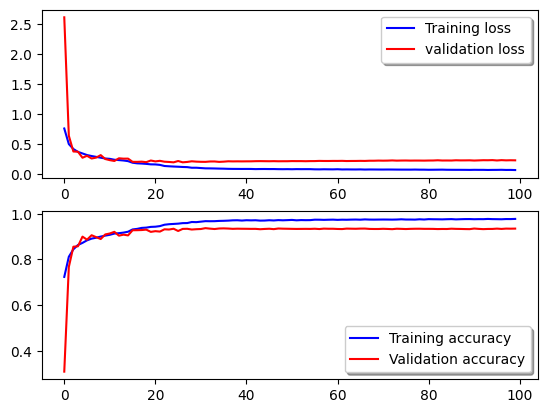

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 256
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

Epoch 1/50
375/375 [==============================] - 43s 110ms/step - loss: 0.2904 - accuracy: 0.8941 - val_loss: 0.2408 - val_accuracy: 0.9108 - lr: 1.0000e-04
Epoch 2/50
375/375 [==============================] - 41s 109ms/step - loss: 0.2136 - accuracy: 0.9208 - val_loss: 0.2014 - val_accuracy: 0.9240 - lr: 1.0000e-04
Epoch 3/50
375/375 [==============================] - 41s 109ms/step - loss: 0.2020 - accuracy: 0.9245 - val_loss: 0.2002 - val_accuracy: 0.9259 - lr: 1.0000e-04
Epoch 4/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1890 - accuracy: 0.9311 - val_loss: 0.1870 - val_accuracy: 0.9322 - lr: 1.0000e-04
Epoch 5/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1777 - accuracy: 0.9332 - val_loss: 0.1801 - val_accuracy: 0.9350 - lr: 1.0000e-04
Epoch 6/50
375/375 [==============================] - 41s 108ms/step - loss: 0.1732 - accuracy: 0.9359 - val_loss: 0.1890 - val_accuracy: 0.9345 - lr: 1.0000e-04
Epoch 7/50
375/375 [========

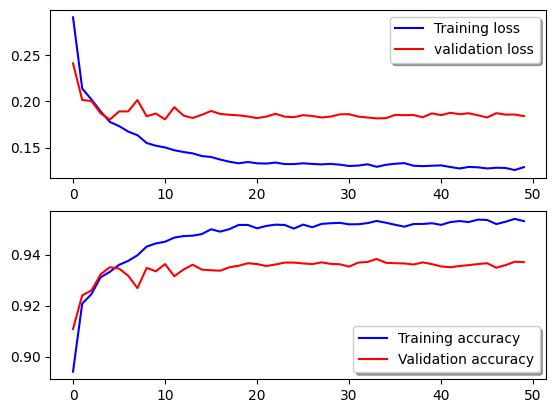

In [4]:
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0001, rho=0.9999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

Epoch 1/50
375/375 [==============================] - 43s 111ms/step - loss: 0.2559 - accuracy: 0.9057 - val_loss: 0.2070 - val_accuracy: 0.9242 - lr: 1.0000e-04
Epoch 2/50
375/375 [==============================] - 41s 108ms/step - loss: 0.1868 - accuracy: 0.9296 - val_loss: 0.1854 - val_accuracy: 0.9318 - lr: 1.0000e-04
Epoch 3/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1764 - accuracy: 0.9351 - val_loss: 0.1827 - val_accuracy: 0.9353 - lr: 1.0000e-04
Epoch 4/50
375/375 [==============================] - 41s 110ms/step - loss: 0.1705 - accuracy: 0.9360 - val_loss: 0.1847 - val_accuracy: 0.9337 - lr: 1.0000e-04
Epoch 5/50
375/375 [==============================] - 41s 108ms/step - loss: 0.1604 - accuracy: 0.9415 - val_loss: 0.1820 - val_accuracy: 0.9355 - lr: 1.0000e-04
Epoch 6/50
375/375 [==============================] - 41s 109ms/step - loss: 0.1568 - accuracy: 0.9422 - val_loss: 0.1853 - val_accuracy: 0.9338 - lr: 1.0000e-04
Epoch 7/50
375/375 [========

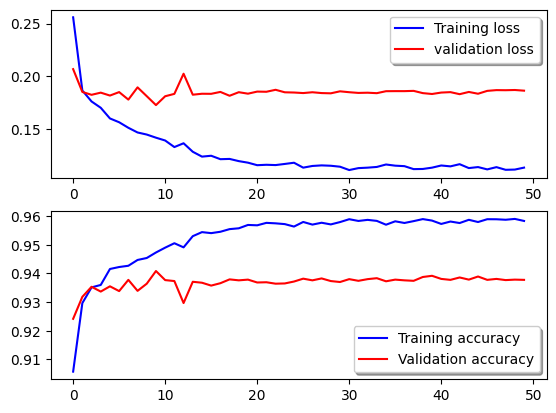

In [5]:
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0001, rho=0.9999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

In [14]:
import joblib

filename = "cnn-model03-augmentation02.joblib"
joblib.dump(model, filename)

print("Model saved.")

INFO:tensorflow:Assets written to: ram://648288e4-52fe-4e04-90ba-55db9a73987b/assets


INFO:tensorflow:Assets written to: ram://648288e4-52fe-4e04-90ba-55db9a73987b/assets


Model saved.


In [20]:
import joblib
import numpy as np
from sklearn.metrics import classification_report

test_np = np.array(test_df, dtype='float32')
x_test = test_np[:, 1:] / 255
x_test = x_test.reshape(-1, 28, 28, 1)
y_test = test_df.iloc[:, 0]

model1 = joblib.load(filename)
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(classification_report(y_test, y_pred, target_names=class_names))


313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

 T_shirt/top       0.91      0.88      0.89      1000
     Trouser       0.99      1.00      0.99      1000
    Pullover       0.95      0.89      0.92      1000
       Dress       0.96      0.90      0.93      1000
        Coat       0.93      0.91      0.92      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.75      0.90      0.82      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      1.00      0.99      1000
  Ankle boot       0.98      0.98      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

